# Loading EEGs 
The purpose of this notebook is to show how to load EEG files in the eeg.h5 format (eeg-hdfstorage) and in edf format using edflib (or pyedf).

Note that one problem with edf format is it seems that there is enough variance in following it that it is not always loaded easily.

Note that the pip installs need to be done, then the runtime needs restarting to allow for import

In [1]:
import eeghdf
import eegvis
import eegvis.stacklineplot
import eegvis.stackplot_bokeh as splotb
import eegvis.nb_eegview as nb_eegview
import edflib  # pyedf is also an option

In [2]:
from bokeh.io import output_notebook, push_notebook
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
output_notebook() # note in ordinary jupyter notebook only need this once, in colab needed for each cell with bokeh

Loading BokehJS ...

In [8]:
## configuration
from dynaconf import settings

EEGML_TEMPLE_SZv151 = "/mnt/data1/eegdbs/TUH/temple/tuh_eeg_seizure/v1.5.1"

In [9]:
settings.as_dict()

{}

In [10]:
settings.COMMENTJSON_ENABLED_FOR_DYNACONF

False

In [12]:
ef = edflib.EdfReader('/mnt/data1/eegdbs/stevenson_neonatal_eeg/edf/eeg10.edf')

In [13]:
ef.read_annotations()

[]

In [14]:
labels = ef.get_signal_text_labels()
labels

['EEG Fp1-Ref',
 'EEG Fp2-Ref',
 'EEG F3-Ref',
 'EEG F4-Ref',
 'EEG F7-Ref',
 'EEG F8-Ref',
 'EEG Fz-Ref',
 'EEG C3-Ref',
 'EEG C4-Ref',
 'EEG Cz-Ref',
 'EEG T3-Ref',
 'EEG T5-Ref',
 'EEG T4-Ref',
 'EEG T6-Ref',
 'EEG P3-Ref',
 'EEG P4-Ref',
 'EEG Pz-Ref',
 'EEG O1-Ref',
 'EEG O2-Ref',
 'ECG EKG',
 'Resp Effort']

In [15]:
ef.get_samples_per_signal()

array([1389312, 1389312, 1389312, 1389312, 1389312, 1389312, 1389312,
       1389312, 1389312, 1389312, 1389312, 1389312, 1389312, 1389312,
       1389312, 1389312, 1389312, 1389312, 1389312, 1389312, 1389312])

In [16]:
ef.get_signal_freqs()

array([256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256.])

In [17]:
N=19
fs = int(ef.get_signal_freqs()[0])
assert np.all(ef.get_signal_freqs() == fs)
(N,fs)

(19, 256)

In [18]:
# this method assumes we have lots of RAM as will load entire EEG into memory, won't work for very long
slist = [ef.get_signal(ii) for ii in range(N)]

## a different method to load a portion of each channel into an array
#slist = []
#L = fs * 50 # num of samples
#start_sample = 0

#for signum in range(N):
#    dest = np.empty((L,), dtype=np.float64) # buffer
#    ef.read_phys_signal(signum, start_sample, L, dest)
#    slist.append(dest)

In [19]:
slist[0][:20]

array([ -8.52886795, -18.90215839, -17.73098044, -16.72711362,
       -17.73098044, -18.56753612, -19.57140294, -15.7232468 ,
       -19.57140294, -22.24838112, -13.8828243 , -16.22518021,
       -16.89442476, -14.88669112, -15.38862453, -15.89055794,
       -17.22904703, -17.22904703, -17.22904703, -15.55593567])

In [20]:
M = ef.get_samples_per_signal()[0]
S = np.empty((N,M))



In [21]:
# create a single matrix with all the waveform data
for ii in range(N):
  S[ii,:] = slist[ii]

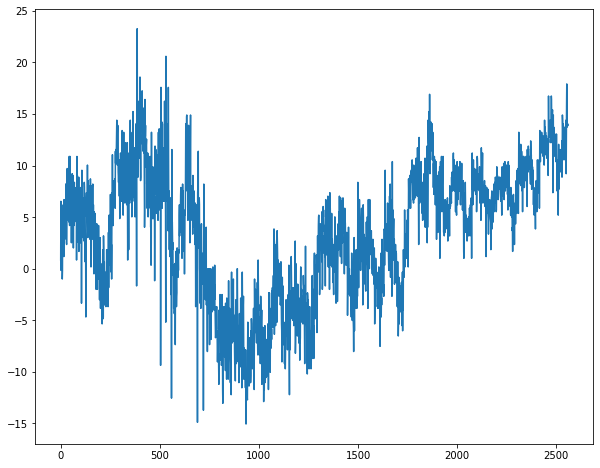

In [22]:
# plot a single channel in raw form to look at its values
plt.plot(slist[0][256*30:256*(30+10)])

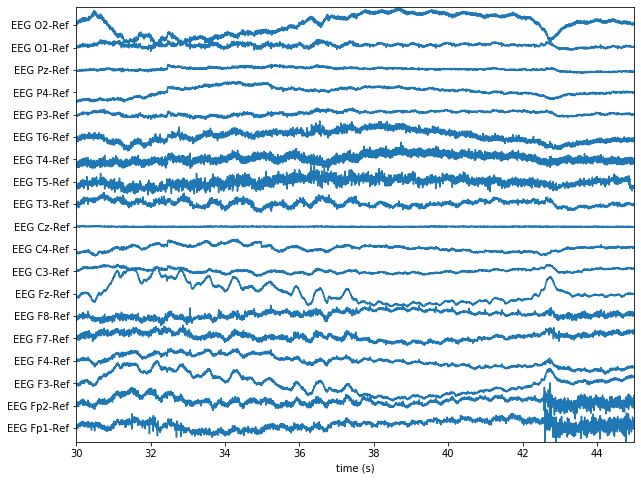

In [23]:
import eegvis.stacklineplot
t0 =30   # start time for plotting in seconds
T = 15.0 # page length in seconds
eegvis.stacklineplot.stackplot(S[:,t0*fs:fs*(t0+int(15))],seconds=T,start_time=t0,
                                 ylabels=ef.get_signal_text_labels(),
                                 yscale=1.5,
                                 )

### Demonstrate how to use eeg hdf5 storage
This form of storage has multiple advantages. It is well defined and supported by virtually all languages. 

It allows for accessing waveform data without reading in the entirety of the image as if it was a continuous array. Automatic conversion to physical units (usually microvolts) is available as well, again simulating a numpy like array interface.

In [24]:
hf = eeghdf.Eeghdf('/mnt/data1/eegdbs/stevenson_neonatal_eeg/hdf/eeg10.eeg.h5')

In [25]:
hf.age_years

0.0

In [26]:
hf.duration_seconds_float

5427.0

In [27]:
hf.physical_dimensions

['uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV',
 'uV']

In [28]:
hf.electrode_labels

['EEG Fp1-Ref',
 'EEG Fp2-Ref',
 'EEG F3-Ref',
 'EEG F4-Ref',
 'EEG F7-Ref',
 'EEG F8-Ref',
 'EEG Fz-Ref',
 'EEG C3-Ref',
 'EEG C4-Ref',
 'EEG Cz-Ref',
 'EEG T3-Ref',
 'EEG T5-Ref',
 'EEG T4-Ref',
 'EEG T6-Ref',
 'EEG P3-Ref',
 'EEG P4-Ref',
 'EEG Pz-Ref',
 'EEG O1-Ref',
 'EEG O2-Ref',
 'ECG EKG',
 'Resp Effort']

In [29]:
hf.shortcut_elabels 

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'F7',
 'F8',
 'Fz',
 'C3',
 'C4',
 'Cz',
 'T3',
 'T5',
 'T4',
 'T6',
 'P3',
 'P4',
 'Pz',
 'O1',
 'O2',
 'EKG',
 'Resp Effort']

In [30]:
hf.annotations_contain('seizure')

,text,starts_sec,starts_100ns


In [31]:
hf.edf_annotations_df

,text,starts_sec,starts_100ns


In [32]:
hf._annotations_df

,text,starts_sec,starts_100ns


## eegvis has tools for interactive visualization of EEG
This is based around bokeh and allows for dynamic interaction in the notebook with some limitations in alternative notebooks like colab and azure notebooks.

In [33]:
fig=splotb.show_epoch_centered(hf.phys_signals, 20, epoch_width_sec=10, chstart=0, chstop=19,
                               fs=hf.sample_frequency,ylabels=hf.electrode_labels)

In [34]:
output_notebook() # needs to be called in the same cells as the widget
from bokeh.plotting import show
show(fig)

# note in google colab the interactive features don't work currently

Loading BokehJS ...

In [41]:
## An EEG browser (only works in pure jupyter notebook or jupyterlab)
output_notebook()
# current built in montage derivations: 'trace', 'tcp', double banana', laplacian', neonatal', 'DB-REF'
eegplot = nb_eegview.EeghdfBrowser(eeghdf_file=hf, montage='neonatal', yscale=3.0)
eegplot.loc_sec = 50
eegplot.show()

#### NOTE the menu/button interactive features don't seem to work in colab  ####

Loading BokehJS ...

In [38]:
# in pure jupyter notebook can do things like this
eegplot.loc_sec = 100.0
eegplot.update()